In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Desktop\\python\\New folder\\ml\\dataset\\adult.csv",header=None,names=['age','workclass','fnlwgt','education','education.non','marital.status','occupation','relationship','face','gender','capital_gain',
      'capital-loss','hours-per-week','native-country','income'])


In [3]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.non     0
marital.status    0
occupation        0
relationship      0
face              0
gender            0
capital_gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [4]:
df[(df.workclass==' ?') | (df.occupation==' ?')].shape

(3686, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.non,marital.status,occupation,relationship,face,gender,capital_gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
df.income.value_counts()

 <=50K    49440
 >50K     15682
Name: income, dtype: int64

In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.non     0
marital.status    0
occupation        0
relationship      0
face              0
gender            0
capital_gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
df[df.workclass==' ?'].shape

(3672, 15)

In [9]:
df.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'face', 'gender', 'native-country', 'income'],
      dtype='object')

In [10]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        #print ("{}".format(float(num_non) / num_data * 100))
        print ("\n")


workclass
3672


occupation
3686


native-country
1166




In [11]:
df=df[df["workclass"] !=' ?']
df=df[df["occupation"] !=' ?']
df=df[df["native-country"] !=' ?']


In [12]:
df.shape

(60324, 15)

In [13]:
df.income.value_counts()

 <=50K    45308
 >50K     15016
Name: income, dtype: int64

In [14]:
df.income[0]

' <=50K'

In [15]:
df.income=df.income.map({'<-50k':0,' >50k':1})

In [16]:
#print (df.select_dtypes(include=['object']).columns)
df.workclass.value_counts()

 Private             44572
 Self-emp-not-inc     4998
 Local-gov            4134
 State-gov            2558
 Self-emp-inc         2148
 Federal-gov          1886
 Without-pay            28
Name: workclass, dtype: int64

In [17]:
df.income.value_counts()

Series([], Name: income, dtype: int64)

In [18]:
X = df.drop('income',axis=1)

y = df.income

In [19]:
X.head()

,age,workclass,fnlwgt,education,education.non,marital.status,occupation,relationship,face,gender,capital_gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [20]:
y.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: income, dtype: float64

In [21]:
### Education is a categorical feature
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [22]:
df.select_dtypes(include=['object']).head()

,workclass,education,marital.status,occupation,relationship,face,gender,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [23]:
### one hot encoding for nominal features using get_dummies() in pandas
### another option,OneHotEncoder class in scikit-learn

pd.get_dummies(df['gender']).head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [24]:
### decide  which categorical features we want to use in model

for col_name in df.columns:
    if df[col_name].dtypes=='object':
        unique_cat = df[col_name].nunique()
        
        print('feature {} has {} unique categories'.format(col_name,unique_cat))

feature workclass has 7 unique categories
feature education has 16 unique categories
feature marital.status has 7 unique categories
feature occupation has 14 unique categories
feature relationship has 6 unique categories
feature face has 5 unique categories
feature gender has 2 unique categories
feature native-country has 41 unique categories


In [25]:
df['native-country'].value_counts()

 United-States                 55008
 Mexico                         1220
 Philippines                     376
 Germany                         256
 Puerto-Rico                     218
 Canada                          214
 El-Salvador                     200
 India                           200
 Cuba                            184
 England                         172
 Jamaica                         160
 South                           142
 Italy                           136
 China                           136
 Dominican-Republic              134
 Vietnam                         128
 Guatemala                       126
 Japan                           118
 Poland                          112
 Columbia                        112
 Iran                             84
 Haiti                            84
 Taiwan                           84
 Portugal                         68
 Nicaragua                        66
 Peru                             60
 Greece                           58
 

In [32]:
%matplotlib inline

import matplotlib.pyplot as plt

In [33]:
lt_50=df[df.income==0]['native-country'].value_counts()
gt_50 = df[df.income==1]['native-country'].value_counts()

df_new = pd.DataFrame([lt_50,gt_50])
df_new.index = ['<=50','>50']
df_new.plot(kind='bar',stacked=True)

TypeError: Empty 'DataFrame': no numeric data to plot

In [29]:
df['native-country'].value_counts()

 United-States                 55008
 Mexico                         1220
 Philippines                     376
 Germany                         256
 Puerto-Rico                     218
 Canada                          214
 El-Salvador                     200
 India                           200
 Cuba                            184
 England                         172
 Jamaica                         160
 South                           142
 Italy                           136
 China                           136
 Dominican-Republic              134
 Vietnam                         128
 Guatemala                       126
 Japan                           118
 Poland                          112
 Columbia                        112
 Iran                             84
 Haiti                            84
 Taiwan                           84
 Portugal                         68
 Nicaragua                        66
 Peru                             60
 Greece                           58
 

In [ ]:
df['native-country'] = ['US' if x==' United-States' else 'others' for x in df['native-country']]

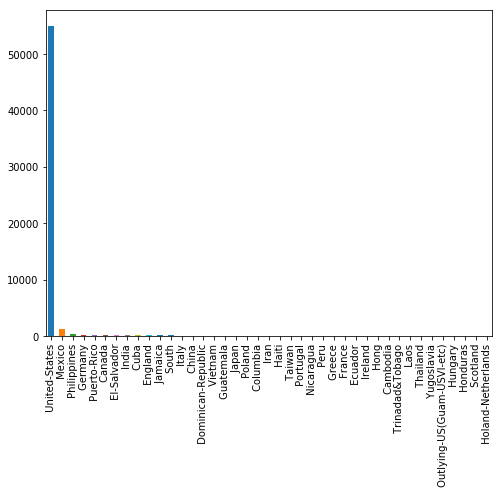

In [28]:
plt.figure(figsize=(8,6))
df['native-country'].value_counts().plot(kind='bar')
#df['native-country'].nunique()

plt.show()

In [30]:
df['native-country'].value_counts()

 United-States                 55008
 Mexico                         1220
 Philippines                     376
 Germany                         256
 Puerto-Rico                     218
 Canada                          214
 El-Salvador                     200
 India                           200
 Cuba                            184
 England                         172
 Jamaica                         160
 South                           142
 Italy                           136
 China                           136
 Dominican-Republic              134
 Vietnam                         128
 Guatemala                       126
 Japan                           118
 Poland                          112
 Columbia                        112
 Iran                             84
 Haiti                            84
 Taiwan                           84
 Portugal                         68
 Nicaragua                        66
 Peru                             60
 Greece                           58
 

In [31]:
df.select_dtypes(include=['object']).columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'face', 'gender', 'native-country'],
      dtype='object')

In [ ]:
c=df.select_dtypes(include=['object'])

In [ ]:
X1=pd.get_dummies(df[c.columns])

In [ ]:
X1.shape

In [ ]:
new_df=pd.concat([X1,df.select_dtypes(exclude=['object'])],axis=1)

In [ ]:
new_df.shape

In [ ]:
z=df.select_dtypes(exclude=['object']).columns

In [ ]:
new_df[z]

In [ ]:
X= new_df.drop('income',1)

In [ ]:
y = new_df['income']

In [ ]:
data = pd.read_csv('dataset/weather_data.txt',parse_dates=['day'])

In [ ]:
df_1=df
df_1=df_1.select_dtypes(exclude=['object'])

In [ ]:
df_1.shape

In [ ]:
df_1.head()

In [ ]:
X_new=  df_1.drop('income',1)
y_new = df_1.income

In [ ]:
X_new.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_new,y_new,test_size=.25,random_state=0)

In [ ]:
log1=LogisticRegression()
log1.fit(X_train_1,y_train_1)

In [ ]:
y_p=[1[1]]for iin log1.predict_prabola

In [ ]:
from sklearn.metrics import roc_aur_score
roc_aur_score(y_test_1.y_p)